In [1]:
import sys
import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf
import platform

print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Python Platform: macOS-13.2.1-arm64-arm-64bit
Tensor Flow Version: 2.12.0
Keras Version: 2.12.0

Python 3.10.10 | packaged by conda-forge | (main, Mar 24 2023, 20:12:31) [Clang 14.0.6 ]
Pandas 2.1.1
Scikit-Learn 1.2.2
GPU is available


In [2]:
# IMPORTING STATEMENTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import mutual_information_regression as mri
#import helper_functions_fs as hf

np.random.seed(7)

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
import warnings
warnings.filterwarnings('ignore')

# Import the Data

In [5]:
# training data
data = pd.read_csv('../../0_data/train.csv', index_col=0).reset_index(drop=True)
data.head()

InterestRate  MinorityRatio  CensusTractMedFamIncome  MonthlyIncome  \
0         3.750          5.631                    96500           4693   
1         4.375          5.745                    93258           3194   
2         2.750         21.300                    82260           6344   
3         3.375          4.000                    71172           9776   
4         4.250          8.000                    65755           3800   

   HUDMedIncome   LTV  PaymentCount  Age1  Age2  HousingExpense  ...  \
0         69400  72.0           360    65    61           21.76  ...   
1         94200  79.0           360    34     0           30.74  ...   
2         81700  99.0           360    32    56           27.87  ...   
3         76700  80.0           360    25    25            9.00  ...   
4         73100  80.0           360    30     0           12.00  ...   

   State_31  State_39  State_42  State_48  State_55  State_infrequent_sklearn  \
0       0.0       0.0       0.0       0.0       1.0                       0.0   
1       0.0       0.0       0.0       0.0       1.0                       0.0   
2       0.0       0.0       0.0       0.0       0.0                       0.0   
3       0.0       1.0       0.0       0.0       0.0                       0.0   
4       0.0       1.0       0.0       0.0       0.0                       0.0   

   Minority_Min  Minority_Missing  Minority_White  Borrower2Dummy  
0           0.0               0.0             1.0               1  
1           0.0               0.0             1.0               0  
2           0.0               0.0             1.0               1  
3           0.0               0.0             1.0               1  
4           0.0               0.0             1.0               0  

[5 rows x 74 columns]


# REMOVE SENSITIVE VARIABLES


da **Lee, Floridi**: "
All predictors in the feature set (Appendix) were used, with the exception of race, sex, and minority population of the census tract area.
In the US, the Equal Credit Opportunity Act (ECOA) of 1974 prohibits credit discrimination on the basis of race, and this would preclude lenders from including these features in the decision- making process. Legally, lenders are required to make lending decisions “as if they had no information about the applicant’s race, regardless of whether race is or is not a good proxy for risk factors not easily observed by a lender” (Ladd 1998). There are important studies showing that the inclusion of these features may result in both fairer and more accurate outcomes (Kleinberg et al. 2018), which will be addressed in the Sect. 4.4. 
"

rimuovo:
- 'Age1', 
- 'Age2',
- 'Gender1_1',  'Gender1_2',  'Gender1_3', 'Gender2_1', 'Gender2_2', 'Gender2_3', 'Gender2_4',
- 'Race1_2', 'Race1_5', 'Race1_6', 'Race1_infrequent_sklearn', 
- 'Minority2_Min', 'Minority2_Missing', 'Minority2_White', 'Race2_5', 'Race2_6', 'Race2_8','Race2_infrequent_sklearn',
- 'Minority_Min', 'Minority_Missing', 'Minority_White',


**RIMUOVO ANCHE Borrower2Dummy**

In [6]:
data.columns

Index(['InterestRate', 'MinorityRatio', 'CensusTractMedFamIncome',
       'MonthlyIncome', 'HUDMedIncome', 'LTV', 'PaymentCount', 'Age1', 'Age2',
       'HousingExpense', 'DebtExpense', 'PMI', 'CreditScore1', 'CreditScore2',
       'NoteDate', 'NoteAmount', 'BorrowerCount', 'FirstTime', 'SelfEmployed',
       'Bank_Boston', 'Bank_Chicago', 'Bank_Cincinnati', 'Bank_Dallas',
       'Bank_Des Moines', 'Bank_Indianapolis', 'Bank_Pittsburgh',
       'Bank_Topeka', 'Bank_infrequent_sklearn', 'LoanPurpose_1',
       'LoanPurpose_2', 'LoanPurpose_6', 'MortgageType_0',
       'MortgageType_infrequent_sklearn', 'Gender1_1', 'Gender1_2',
       'Gender1_3', 'Gender2_1', 'Gender2_2', 'Gender2_3', 'Gender2_4',
       'PropertyType_1', 'PropertyType_6', 'PropertyType_7',
       'PropertyType_infrequent_sklearn', 'Race1_2', 'Race1_5', 'Race1_6',
       'Race1_infrequent_sklearn', 'Minority2_Min', 'Minority2_Missing',
       'Minority2_White', 'Race2_5', 'Race2_6', 'Race2_8',
       'Race2_infrequent_

In [7]:
((data['BorrowerCount']-1)==data['Borrower2Dummy']).sum()/len(data)

0.997905637326197

In [8]:
data.drop(['Age1', 'Age2','Gender1_1',  'Gender1_2',  'Gender1_3', 'Gender2_1', 'Gender2_2', 'Gender2_3', 'Gender2_4',
            'Race1_2', 'Race1_5', 'Race1_6', 'Race1_infrequent_sklearn', 
            'Minority2_Min', 'Minority2_Missing', 'Minority2_White', 'Race2_5', 'Race2_6', 'Race2_8',
            'Race2_infrequent_sklearn','Minority_Min', 'Minority_Missing', 'Minority_White',
            ], axis=1, inplace=True)

In [9]:
# defining response variable and input features
y = data.pop('InterestRate')
X = data.copy()

In [10]:
# test data
data_test = pd.read_csv('../../0_data/test.csv', index_col=0).reset_index(drop=True)
data_test.head()

InterestRate  MinorityRatio  CensusTractMedFamIncome  MonthlyIncome  \
0         4.000         47.950                    80357          18334   
1         3.250          6.489                   112882          10065   
2         3.475          9.661                   118045          19272   
3         3.125          5.172                   100096           5171   
4         4.750          4.396                    91638          14262   

   HUDMedIncome   LTV  PaymentCount  Age1  Age2  HousingExpense  ...  \
0         95900  80.0           360    39     0           17.07  ...   
1         86200  72.0           360    64    66           20.14  ...   
2         82300  72.0           360    62    62           14.70  ...   
3         89200  80.0           180    43     0           25.31  ...   
4         79600  80.0           360    39    31           12.66  ...   

   State_31  State_39  State_42  State_48  State_55  State_infrequent_sklearn  \
0       0.0       0.0       0.0       1.0       0.0                       0.0   
1       0.0       0.0       0.0       0.0       0.0                       1.0   
2       0.0       0.0       0.0       0.0       1.0                       0.0   
3       0.0       0.0       0.0       0.0       0.0                       0.0   
4       0.0       0.0       0.0       0.0       0.0                       0.0   

   Minority_Min  Minority_Missing  Minority_White  Borrower2Dummy  
0           0.0               0.0             1.0               0  
1           0.0               0.0             1.0               1  
2           0.0               1.0             0.0               1  
3           0.0               0.0             1.0               0  
4           0.0               0.0             1.0               1  

[5 rows x 74 columns]

In [11]:
data_test.drop(['Age1', 'Age2','Gender1_1',  'Gender1_2',  'Gender1_3', 'Gender2_1', 'Gender2_2', 'Gender2_3', 'Gender2_4',
            'Race1_2', 'Race1_5', 'Race1_6', 'Race1_infrequent_sklearn', 
            'Minority2_Min', 'Minority2_Missing', 'Minority2_White', 'Race2_5', 'Race2_6', 'Race2_8',
            'Race2_infrequent_sklearn','Minority_Min', 'Minority_Missing', 'Minority_White',
            ], axis=1, inplace=True)

In [12]:
y_test = data_test.pop('InterestRate')
X_test = data_test.copy()

# Scaling: Standardization
It helps in cases where the features have different units or scales, and you want to ensure that no single feature dominates the learning process.

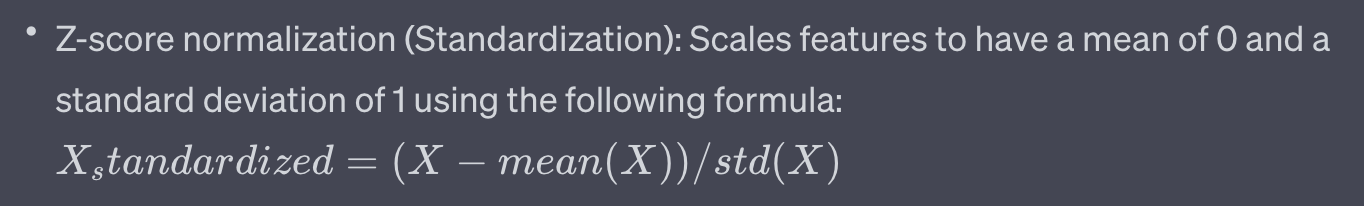


Standardization:
Standardizing the features around the center and 0 with a standard deviation of 1 is important when we compare measurements that have different units. Variables that are measured at different scales do not contribute equally to the analysis and might end up creating a bais.

For example, A variable that ranges between 0 and 1000 will outweigh a variable that ranges between 0 and 1. Using these variables without standardization will give the variable with the larger range weight of 1000 in the analysis. Transforming the data to comparable scales can prevent this problem. Typical data standardization procedures equalize the range and/or data variability.





### ONLY NUMERICAL VARS




In [13]:
numerical = pd.read_csv('../../0_data/numerical.csv', index_col=0)
#numerical

In [14]:
remove_num = set(numerical.iloc[1:,0]).intersection(set(X.columns))
remove_num = list(remove_num)
remove_num

['CreditScore1',
 'PaymentCount',
 'LTV',
 'CreditScore2',
 'DebtExpense',
 'MonthlyIncome',
 'HUDMedIncome',
 'CensusTractMedFamIncome',
 'NoteDate',
 'HousingExpense',
 'PMI',
 'MinorityRatio',
 'NoteAmount']

In [15]:
# separate numerical and dummies

X_num = pd.concat([X.pop(col) for col in list(remove_num)], axis=1)
X['BorrowerCount'] = X['BorrowerCount']-1

X_test_num = pd.concat([X_test.pop(col) for col in list(remove_num)], axis=1)
X_test['BorrowerCount'] = X_test['BorrowerCount']-1

In [16]:
X_num.head()

CreditScore1  PaymentCount   LTV  CreditScore2  DebtExpense  MonthlyIncome  \
0             2           360  72.0             2        41.21           4693   
1             5           360  79.0             9        42.45           3194   
2             3           360  99.0             4        34.72           6344   
3             5           360  80.0             5        10.00           9776   
4             4           360  80.0             9        23.00           3800   

   HUDMedIncome  CensusTractMedFamIncome  NoteDate  HousingExpense  PMI  \
0         69400                    96500      2019           21.76  0.0   
1         94200                    93258      2019           30.74  0.0   
2         81700                    82260      2020           27.87  0.0   
3         76700                    71172      2020            9.00  0.0   
4         73100                    65755      2019           12.00  0.0   

   MinorityRatio  NoteAmount  
0          5.631      146000  
1          5.745      129000  
2         21.300      311258  
3          4.000      130000  
4          8.000       72000

In [17]:
X.head()

BorrowerCount  FirstTime  SelfEmployed  Bank_Boston  Bank_Chicago  \
0              1          0             0          0.0           1.0   
1              0          1             1          0.0           1.0   
2              1          1             0          0.0           0.0   
3              1          1             0          0.0           0.0   
4              0          0             1          0.0           0.0   

   Bank_Cincinnati  Bank_Dallas  Bank_Des Moines  Bank_Indianapolis  \
0              0.0          0.0              0.0                0.0   
1              0.0          0.0              0.0                0.0   
2              0.0          0.0              0.0                0.0   
3              1.0          0.0              0.0                0.0   
4              1.0          0.0              0.0                0.0   

   Bank_Pittsburgh  ...  State_26  State_27  State_29  State_31  State_39  \
0              0.0  ...       0.0       0.0       0.0       0.0       0.0   
1              0.0  ...       0.0       0.0       0.0       0.0       0.0   
2              0.0  ...       0.0       0.0       0.0       0.0       0.0   
3              0.0  ...       0.0       0.0       0.0       0.0       1.0   
4              0.0  ...       0.0       0.0       0.0       0.0       1.0   

   State_42  State_48  State_55  State_infrequent_sklearn  Borrower2Dummy  
0       0.0       0.0       1.0                       0.0               1  
1       0.0       0.0       1.0                       0.0               0  
2       0.0       0.0       0.0                       0.0               1  
3       0.0       0.0       0.0                       0.0               1  
4       0.0       0.0       0.0                       0.0               0  

[5 rows x 37 columns]

In [18]:
print(len(y_test) , len(X_test))

47270 47270


In [19]:
# scale numerical vars 
ss = StandardScaler()
X_train_num = ss.fit_transform(X_num)
X_test_num = ss.transform(X_test_num)
X_num = pd.DataFrame(X_train_num, columns=remove_num)
X_test_num = pd.DataFrame(X_test_num, columns=remove_num)
X_num.describe()

CreditScore1  PaymentCount           LTV  CreditScore2   DebtExpense  \
count  1.890790e+05  1.890790e+05  1.890790e+05  1.890790e+05  1.890790e+05   
mean   2.442832e-16  2.689164e-16  6.964825e-16  2.375942e-16  6.650381e-16   
std    1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00   
min   -4.275040e+00 -3.667909e+00 -8.617748e-01 -2.317892e+00 -3.148844e+00   
25%   -5.143845e-01 -2.778056e-01 -8.617748e-01 -5.737875e-01 -7.560665e-01   
50%    7.391671e-01  5.697203e-01 -9.168695e-02 -5.737875e-01  8.581993e-03   
75%    7.391671e-01  5.697203e-01  1.650090e-01  1.170317e+00  7.836339e-01   
max    7.391671e-01  5.697203e-01  5.170580e+00  1.170317e+00  5.361121e+00   

       MonthlyIncome  HUDMedIncome  CensusTractMedFamIncome      NoteDate  \
count   1.890790e+05  1.890790e+05             1.890790e+05  1.890790e+05   
mean    6.898592e-17 -1.819958e-16             4.329118e-17  2.158467e-14   
std     1.000003e+00  1.000003e+00             1.000003e+00  1.000003e+00   
min    -1.541693e+00 -3.136269e+00            -2.968603e+00 -7.010553e+00   
25%    -6.998868e-01 -6.839963e-01            -6.907823e-01 -1.000778e+00   
50%    -2.267679e-01 -6.296614e-02            -2.074440e-01  2.011766e-01   
75%     4.021168e-01  5.102925e-01             5.193869e-01  1.403131e+00   
max     3.701777e+00  3.949844e+00             4.143399e+00  1.403131e+00   

       HousingExpense           PMI  MinorityRatio    NoteAmount  
count    1.890790e+05  1.890790e+05   1.890790e+05  1.890790e+05  
mean     1.323913e-16  3.112493e-17  -2.335544e-16 -4.906427e-17  
std      1.000003e+00  1.000003e+00   1.000003e+00  1.000003e+00  
min     -2.410365e+00 -4.158231e-01  -9.829129e-01 -1.761821e+00  
25%     -7.202951e-01 -4.158231e-01  -6.899229e-01 -7.500204e-01  
50%     -1.531912e-01 -4.158231e-01  -3.806037e-01 -2.017936e-01  
75%      5.862923e-01 -4.158231e-01   2.836096e-01  5.519377e-01  
max      4.372398e+00  7.908332e+00   3.195775e+00  4.433948e+00

In [20]:
## merge back together numerical and dummies
X = pd.concat([X, X_num], axis=1, ignore_index=False)
X_test = pd.concat([X_test, X_test_num], axis=1,ignore_index=False)

In [21]:
X_test

BorrowerCount  FirstTime  SelfEmployed  Bank_Boston  Bank_Chicago  \
0                  0          0             0          0.0           0.0   
1                  1          0             0          0.0           0.0   
2                  1          0             0          0.0           1.0   
3                  0          0             0          0.0           0.0   
4                  1          1             1          0.0           1.0   
...              ...        ...           ...          ...           ...   
47265              1          0             0          0.0           0.0   
47266              1          0             0          0.0           0.0   
47267              1          1             1          0.0           0.0   
47268              1          0             0          0.0           0.0   
47269              0          0             0          0.0           0.0   

       Bank_Cincinnati  Bank_Dallas  Bank_Des Moines  Bank_Indianapolis  \
0                  0.0          1.0              0.0                0.0   
1                  0.0          0.0              1.0                0.0   
2                  0.0          0.0              0.0                0.0   
3                  0.0          0.0              1.0                0.0   
4                  0.0          0.0              0.0                0.0   
...                ...          ...              ...                ...   
47265              1.0          0.0              0.0                0.0   
47266              0.0          0.0              1.0                0.0   
47267              0.0          0.0              0.0                1.0   
47268              0.0          0.0              0.0                0.0   
47269              0.0          0.0              0.0                0.0   

       Bank_Pittsburgh  ...  CreditScore2  DebtExpense  MonthlyIncome  \
0                  0.0  ...      1.170317     0.249940       1.554396   
1                  0.0  ...     -0.573787    -0.944368       0.095701   
2                  0.0  ...     -0.573787    -1.315768       1.719864   
3                  0.0  ...      1.170317     0.964653      -0.767626   
4                  0.0  ...     -0.573787     0.273868       0.836074   
...                ...  ...           ...          ...            ...   
47265              0.0  ...     -0.573787    -0.652033       0.527188   
47266              0.0  ...     -0.573787    -1.473900      -0.257110   
47267              0.0  ...     -0.573787     0.531872       0.710120   
47268              0.0  ...     -1.881866     1.258028      -0.323967   
47269              1.0  ...      1.170317     1.436966      -0.146151   

       HUDMedIncome  CensusTractMedFamIncome  NoteDate  HousingExpense  \
0          1.402028                -0.177398 -1.000778       -0.278104   
1          0.629721                 0.952359  0.201177        0.105378   
2          0.319206                 1.131696 -1.000778       -0.574147   
3          0.868579                 0.508237  0.201177        0.751177   
4          0.104234                 0.214448 -1.000778       -0.828969   
...             ...                      ...       ...             ...   
47265     -0.031118                 2.067980 -1.000778        0.212803   
47266      0.327168                 0.244390 -1.000778       -0.986359   
47267     -0.039080                 0.092007 -1.000778        0.186571   
47268     -0.421253                -0.383863 -1.000778       -0.587888   
47269      2.134525                 0.999877  1.403131        1.243333   

            PMI  MinorityRatio  NoteAmount  
0     -0.415823       2.226057    1.015592  
1     -0.415823      -0.548648    0.056196  
2     -0.415823      -0.336367    0.999468  
3     -0.415823      -0.636786   -0.719384  
4     -0.415823      -0.688718    0.015240  
...         ...            ...         ...  
47265 -0.415823      -0.179834    0.959157  
47266 -0.415823      -0.490291   -0.791621  
47267 -0.415823       

In [22]:
print(len(y) , len(X),  len(X_num))

189079 189079 189079


In [23]:
print(len(y_test) , len(X_test),  len(X_test_num))

47270 47270 47270


In [24]:
X.describe()

BorrowerCount      FirstTime   SelfEmployed    Bank_Boston  \
count  189079.000000  189079.000000  189079.000000  189079.000000   
mean        0.596285       0.196870       0.218633       0.029961   
std         0.490643       0.397634       0.413320       0.170480   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         1.000000       0.000000       0.000000       0.000000   
75%         1.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

        Bank_Chicago  Bank_Cincinnati    Bank_Dallas  Bank_Des Moines  \
count  189079.000000    189079.000000  189079.000000    189079.000000   
mean        0.252773         0.127592       0.068802         0.149112   
std         0.434603         0.333636       0.253118         0.356200   
min         0.000000         0.000000       0.000000         0.000000   
25%         0.000000         0.000000       0.000000         0.000000   
50%         0.000000         0.000000       0.000000         0.000000   
75%         1.000000         0.000000       0.000000         0.000000   
max         1.000000         1.000000       1.000000         1.000000   

       Bank_Indianapolis  Bank_Pittsburgh  ...  CreditScore2   DebtExpense  \
count      189079.000000    189079.000000  ...  1.890790e+05  1.890790e+05   
mean            0.104813         0.062376  ...  2.375942e-16  6.650381e-16   
std             0.306314         0.241838  ...  1.000003e+00  1.000003e+00   
min             0.000000         0.000000  ... -2.317892e+00 -3.148844e+00   
25%             0.000000         0.000000  ... -5.737875e-01 -7.560665e-01   
50%             0.000000         0.000000  ... -5.737875e-01  8.581993e-03   
75%             0.000000         0.000000  ...  1.170317e+00  7.836339e-01   
max             1.000000         1.000000  ...  1.170317e+00  5.361121e+00   

       MonthlyIncome  HUDMedIncome  CensusTractMedFamIncome      NoteDate  \
count   1.890790e+05  1.890790e+05             1.890790e+05  1.890790e+05   
mean    6.898592e-17 -1.819958e-16             4.329118e-17  2.158467e-14   
std     1.000003e+00  1.000003e+00             1.000003e+00  1.000003e+00   
min    -1.541693e+00 -3.136269e+00            -2.968603e+00 -7.010553e+00   
25%    -6.998868e-01 -6.839963e-01            -6.907823e-01 -1.000778e+00   
50%    -2.267679e-01 -6.296614e-02            -2.074440e-01  2.011766e-01   
75%     4.021168e-01  5.102925e-01             5.193869e-01  1.403131e+00   
max     3.701777e+00  3.949844e+00             4.143399e+00  1.403131e+00   

       HousingExpense           PMI  MinorityRatio    NoteAmount  
count    1.890790e+05  1.890790e+05   1.890790e+05  1.890790e+05  
mean     1.323913e-16  3.112493e-17  -2.335544e-16 -4.906427e-17  
std      1.000003e+00  1.000003e+00   1.000003e+00  1.000003e+00  
min     -2.410365e+00 -4.158231e-01  -9.829129e-01 -1.761821e+00  
25%     -7.202951e-01 -4.158231e-01  -6.899229e-01 -7.500204e-01  
50%     -1.531912e-01 -4.158231e-01  -3.806037e-01 -2.017936e-01  
75%      5.862923e-01 -4.158231e-01   2.836096e-01  5.519377e-01  
max      4.372398e+00  7.908332e+00   3.195775e+00  4.433948e+00  

[8 rows x 50 columns]

In [25]:
X_test.describe()

BorrowerCount     FirstTime  SelfEmployed   Bank_Boston  Bank_Chicago  \
count   47270.000000  47270.000000   47270.00000  47270.000000  47270.000000   
mean        0.598519      0.199069       0.21667      0.029934      0.254474   
std         0.490203      0.399304       0.41198      0.170408      0.435570   
min         0.000000      0.000000       0.00000      0.000000      0.000000   
25%         0.000000      0.000000       0.00000      0.000000      0.000000   
50%         1.000000      0.000000       0.00000      0.000000      0.000000   
75%         1.000000      0.000000       0.00000      0.000000      1.000000   
max         1.000000      1.000000       1.00000      1.000000      1.000000   

       Bank_Cincinnati   Bank_Dallas  Bank_Des Moines  Bank_Indianapolis  \
count     47270.000000  47270.000000     47270.000000       47270.000000   
mean          0.127861      0.066913         0.146732           0.108864   
std           0.333939      0.249875         0.353842           0.311472   
min           0.000000      0.000000         0.000000           0.000000   
25%           0.000000      0.000000         0.000000           0.000000   
50%           0.000000      0.000000         0.000000           0.000000   
75%           0.000000      0.000000         0.000000           0.000000   
max           1.000000      1.000000         1.000000           1.000000   

       Bank_Pittsburgh  ...  CreditScore2   DebtExpense  MonthlyIncome  \
count     47270.000000  ...  47270.000000  47270.000000   47270.000000   
mean          0.062915  ...     -0.004122     -0.005154       0.001329   
std           0.242813  ...      0.999024      0.996644       1.006249   
min           0.000000  ...     -2.317892     -3.044810      -1.529521   
25%           0.000000  ...     -0.573787     -0.756066      -0.700416   
50%           0.000000  ...     -0.573787     -0.001301      -0.225092   
75%           0.000000  ...      1.170317      0.773230       0.396648   
max           1.000000  ...      1.170317      5.361121       3.701777   

       HUDMedIncome  CensusTractMedFamIncome      NoteDate  HousingExpense  \
count  47270.000000             47270.000000  47270.000000    47270.000000   
mean      -0.009301                -0.001609     -0.001429        0.002108   
std        0.997549                 0.997318      1.001281        0.999059   
min       -3.088498                -2.968603     -7.010553       -2.410365   
25%       -0.707882                -0.689905     -1.000778       -0.709053   
50%       -0.070928                -0.206888      0.201177       -0.154440   
75%        0.510292                 0.514281      1.403131        0.586292   
max        3.949844                 4.143399      1.403131        4.372398   

                PMI  MinorityRatio    NoteAmount  
count  47270.000000   47270.000000  47270.000000  
mean      -0.006828      -0.008354     -0.000634  
std        0.992410       0.997249      1.004480  
min       -0.415823      -0.982913     -1.705926  
25%       -0.415823      -0.693135     -0.750020  
50%       -0.415823      -0.389538     -0.207840  
75%       -0.415823       0.268953      0.543956  
max        7.908332       3.195775      4.433948  

[8 rows x 50 columns]

In [26]:
# dependent variables
ss_y = StandardScaler()
y = ss_y.fit_transform(np.array(y).reshape(-1, 1))
y_test = ss_y.transform(np.array(y_test).reshape(-1, 1))
pd.Series(y.flatten()).describe()

count    1.890790e+05
mean    -1.981173e-16
std      1.000003e+00
min     -2.684678e+00
25%     -7.623710e-01
50%     -1.856790e-01
75%      5.832437e-01
max      4.427857e+00
dtype: float64

# no VARIABLE SELECTION APPLICATIONS 


# TODO: Scoring Methods

We define a helper function to save the scores for each model and make a final comparison.

The metrics we will analyse are: 
- MSE: Mean Squared Error
- MAE: Mean Absolute Error
- MR: Mean Residual
- **R2 ???????**
- **FAIRNESS QUALCOSA!!! TODO!!**

# PRENDERE DA ONE NOTE !!!!

In [27]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


def mean_residual(y_true, prediction):
    '''Compute the mean residual metric'''
    residuals = (y_true - prediction)
    MR = residuals.mean()
    return MR


def compute_scores(x, y_true, y_pred):
    '''Compute the following metrics for the given model: MSE, MAE, MR, r2'''
    y_true = y_true.reshape(y_pred.shape)

    MSE = mean_squared_error(y_true, y_pred)
    print(f"MSE: {MSE:.4f}")
    MAE = mean_absolute_error(y_true, y_pred)
    print(f"MAE: {MAE:.4f}")
    MR = mean_residual(y_true, y_pred)
    print(f"MR: {MR:.4f}")
    R2 = r2_score(y_true, y_pred)
    adj_R2 = 1- ((1-R2) * (x.shape[0]-1)/(x.shape[0]-x.shape[1]-1))
    print(f"adj-R2: {adj_R2:.4f}")
    return [MSE, MAE, MR, adj_R2]


def save_scores(model, scores):
    '''Store scores for the given model into a dedicated dataframe for a final comparison across models'''
    MSE, MAE, MR, r2 = scores
    pd.Series(scores).to_csv('scores/'+model)
    model_names.append(model)
    MSEs.append(MSE)
    MAEs.append(MAE)
    MRs.append(MR)
    r2s.append(r2)
    

def display_scores():
    scores_df = pd.DataFrame([model_names, MSEs, MAEs, MRs, r2s], 
                 index=['method', 'MSE', 'MAE', 'MR', 'adj R-squared']).T
    return scores_df

In [28]:
model_names, MSEs, MAEs, MRs, r2s = [],[],[],[],[]

In [29]:
def export_pred(y_pred_std, model, scaler=ss_y):
    '''Reverts model predictions to the original scale of the input data and then saves it to a csv file'''

    y_pred = scaler.inverse_transform(np.array(y_pred_std, ndmin=2)).flatten()
    np.savetxt('predictions/'+str(model)+'_pred.csv', y_pred, delimiter=",")

# MODELS

# 1. Linear Regression

In [30]:
import statsmodels.api as sm

In [31]:
#add constant to predictor variables
x = sm.add_constant(X)
#fit linear regression model
lr = sm.OLS(y, x).fit()

#view model summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     8997.
Date:                Thu, 05 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:54:59   Log-Likelihood:            -1.5316e+05
No. Observations:              189079   AIC:                         3.064e+05
Df Residuals:                  189028   BIC:                         3.069e+05
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [32]:
X_TEST = sm.add_constant(X_test)
lr_pred = lr.predict(X_TEST)
scores = compute_scores(X_TEST, y_test, lr_pred)
save_scores('LinearRegression', scores)

MSE: 0.2978
MAE: 0.4264
MR: -0.0004
adj-R2: 0.7066


In [33]:
export_pred(lr_pred, 'LinearRegression')

# 5. Random Forest

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

## GRIDSEARCH CV

https://www.researchgate.net/publication/230766603_How_Many_Trees_in_a_Random_Forest citare !! per numero di trees:

"The analysis of 29 datasets shows that from128 trees there is no more signiﬁcant diﬀerence between the forests using 256, 512,1024, 2048 and 4096 trees. The mean and the median AUC values do not presentmajor changes from 64 trees. Therefore, it is possible to suggest, based on the ex-periments, a range between 64 and 128 trees in a forest"

In [38]:
forest = GridSearchCV(
    RandomForestRegressor(random_state=0),
    param_grid = {'n_estimators': [8, 16, 64, 96, 128], 
                  'max_depth': range(5,46,10)},
    scoring= 'neg_mean_squared_error',
    verbose=2)

yf= y.flatten()
forest.fit(X,yf)

print(f"\nBest RandomForest with params: {forest.best_params_} and MSE: {forest.best_score_:.3f}")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END ........................max_depth=5, n_estimators=8; total time=   2.4s
[CV] END ........................max_depth=5, n_estimators=8; total time=   2.4s
[CV] END ........................max_depth=5, n_estimators=8; total time=   2.4s
[CV] END ........................max_depth=5, n_estimators=8; total time=   2.4s
[CV] END ........................max_depth=5, n_estimators=8; total time=   2.4s
[CV] END .......................max_depth=5, n_estimators=16; total time=   4.8s
[CV] END .......................max_depth=5, n_estimators=16; total time=   4.8s
[CV] END .......................max_depth=5, n_estimators=16; total time=   4.7s
[CV] END .......................max_depth=5, n_estimators=16; total time=   4.7s
[CV] END .......................max_depth=5, n_estimators=16; total time=   4.7s
[CV] END .......................max_depth=5, n_estimators=64; total time=  19.0s
[CV] END .......................max_depth=5, n_

[CV] END .......................max_depth=45, n_estimators=8; total time=   9.8s
[CV] END .......................max_depth=45, n_estimators=8; total time=   9.8s
[CV] END .......................max_depth=45, n_estimators=8; total time=   9.8s
[CV] END .......................max_depth=45, n_estimators=8; total time=   9.9s
[CV] END ......................max_depth=45, n_estimators=16; total time=  19.7s
[CV] END ......................max_depth=45, n_estimators=16; total time=  19.8s
[CV] END ......................max_depth=45, n_estimators=16; total time=  19.6s
[CV] END ......................max_depth=45, n_estimators=16; total time=  19.8s
[CV] END ......................max_depth=45, n_estimators=16; total time=  19.7s
[CV] END ......................max_depth=45, n_estimators=64; total time= 1.3min
[CV] END ......................max_depth=45, n_estimators=64; total time= 1.3min
[CV] END ......................max_depth=45, n_estimators=64; total time= 1.3min
[CV] END ...................

In [39]:
# Creating a random forest model with the selected parameters
best_forest = RandomForestRegressor(max_depth=forest.best_params_['max_depth'], 
                                    n_estimators=forest.best_params_['n_estimators'])
best_forest.fit(X, yf)

RandomForestRegressor(max_depth=45, n_estimators=128)

In [40]:
def compare_forests(cv_results, model_name='RandomForest'):
    import matplotlib.pyplot as plt
    import numpy as np

    fig, axs = plt.subplots(1, 1, figsize=(6,5))
    fig.suptitle("Complexity - Performance: number of estimators vs score")

    # Plot: number of estimators vs score
    ax = axs
    colors_list2 = plt.cm.Paired(np.arange(len(cv_results['param_max_depth'].unique())))
    for i,num in enumerate(cv_results['param_max_depth'].unique()):
        ax.plot(
            cv_results[  cv_results['param_max_depth']==num   ]['param_n_estimators'],#["param_max_depth"],
            cv_results[  cv_results['param_max_depth']==num   ]["mean_test_score"],
            marker="o",
            color=colors_list2[i],
            label=str(num),
        )
    ax.set_xlabel("Number of Trees")
    ax.set_ylabel("MSE score")

    # Add legend
    axs.legend(loc="lower right", title='Depth of trees')

    plt.tight_layout()
    plt.show()

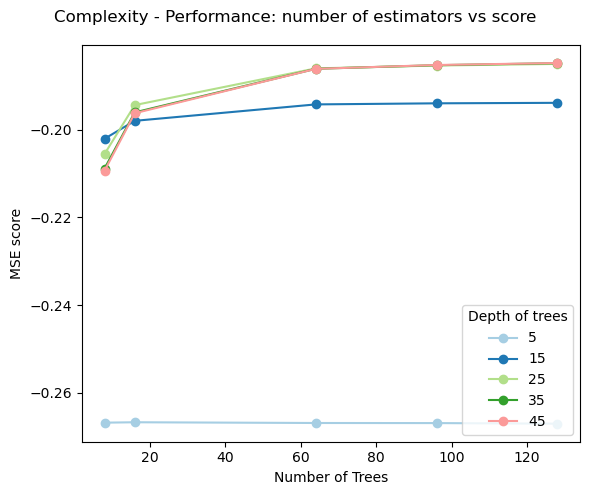

In [41]:
compare_forests( pd.DataFrame(forest.cv_results_) )

### comment? 

In [42]:
forest_pred = best_forest.predict(X_test)
scores = compute_scores(X_test, y_test, forest_pred)
save_scores('RandomForest', scores)

MSE: 0.1828
MAE: 0.3253
MR: -0.0033
adj-R2: 0.8199


In [43]:
export_pred(forest_pred, 'RandomForest')

# 6. XGBoost 

First we explore the default parameters, then move on to cross validation.

In [44]:
from xgboost import XGBRegressor
import time

In [45]:
xgbr = XGBRegressor(tree_method="hist")
start = time.time()
xgbr.fit(X, yf)
elapsed = time.time() - start
print(f'XGB Training ran in {elapsed:.5f} seconds')

XGB Training ran in 0.91903 seconds


## Cross Validation

In [46]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [16, 64, 128],
    'learning_rate': [0.01, 0.1, 0.2, 0.3], # def 0.3
    'max_depth': [3, 4, 6],                 # def 0.6
    'min_child_weight': [1, 2, 3],          # def 1
    'gamma': [0, 0.1, 0.2], # def 0, minimum loss reduction required for further tree splits
    'reg_alpha': [0, 0.5],      # def 0, L1 regularization to the feature weights
    'reg_lambda': [0.5, 1],     # def 1, L2 regularization to the feature weights
    'subsample': [0.8, 1.0],    # def 1
    'colsample_bytree': [0.8, 1.0]} # def 1

In [47]:
xgbr = GridSearchCV(estimator=XGBRegressor(), param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', verbose=2)


In [48]:
xgbr.fit(X, yf)

print(f"\nBest XGBRegressor with params: {xgbr.best_params_} and MSE: {xgbr.best_score_:.3f}")

Fitting 5 folds for each of 5184 candidates, totalling 25920 fits
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, 

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, 

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, 

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, 

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   7.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, s

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subs

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, s

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subs

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, s

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subs

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   7.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, s

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subs

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   7.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, s

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subs

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, s

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subs

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, s

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subs

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, s

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subs

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   7.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, s

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subs

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, s

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subs

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, s

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subs

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, s

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subs

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, s

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subs

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, re

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, re

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alp

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alp

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, 

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, 

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lamb

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_a

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, 

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alp

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, 

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=12

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   7.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   7.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   7.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, 

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   7.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   7.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   7.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   7.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, r

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_a

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_la

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lamb

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, re

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, re

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, 

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, r

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   7.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   7.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   7.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   7.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, re

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   7.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   7.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   6.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   7.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   7.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   7.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   7.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lamb

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, 

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alp

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, 

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, 

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   7.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   6.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   6.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   6.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   6.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   7.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   7.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   7.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   7.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, r

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lamb

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   7.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   7.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   7.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   6.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   6.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, re

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_la

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_l

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_la

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_la

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lamb

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   7.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, re

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   7.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, 

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, 

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, 

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alp

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, 

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alp

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alp

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128,

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alp

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=12

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0,

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, 

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lamb

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   7.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, 

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, re

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, re

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, 

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, r

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, re

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   7.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   7.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   7.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   7.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   7.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lamb

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   7.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   7.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   7.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   7.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   6.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   6.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   6.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   7.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   7.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, 

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alp

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, 

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, 

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, r

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lamb

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   7.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   7.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   7.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   6.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   6.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, re

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   7.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   7.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_la

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   7.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   7.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   7.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   7.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   7.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_l

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_la

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_la

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lamb

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, re

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, re

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   7.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   7.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   7.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   6.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, 

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   6.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, re

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lam

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lam

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lam

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   8.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   8.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   8.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   8.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   7.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   7.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   7.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   7.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   7.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lam

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   8.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   8.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   8.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   8.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, su

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, su

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, su

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   7.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   7.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   7.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   7.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   7.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, su

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   8.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   8.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   8.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   8.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   7.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   7.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   7.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   7.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, su

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, su

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, su

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, su

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   8.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   8.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   8.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   8.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   7.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   7.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   7.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   7.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   7.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, su

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   8.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   8.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   8.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   8.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, su

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, su

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, su

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   7.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   7.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   7.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   7.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   7.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, su

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   8.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   8.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   8.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   8.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsampl

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   7.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   7.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   7.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   7.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   7.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, 

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, re

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alp

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, 

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alp

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=12

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alph

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, re

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=12

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alp

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, 

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, re

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   7.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   7.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   7.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   7.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, 

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, r

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, re

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lamb

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   6.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   6.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   6.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   6.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   8.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   8.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   8.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   9.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   9.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   9.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   9.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   9.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   9.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   9.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   7.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   7.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   7.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   7.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   7.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, 

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alp

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, 

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, 

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   6.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   6.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   6.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, r

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lamb

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, re

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   8.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   8.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   8.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   8.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   8.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_l

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   8.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   8.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   8.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   4.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lamb

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, re

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, re

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, 

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   7.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   7.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   7.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   7.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   7.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, r

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   8.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   8.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   8.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   8.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, re

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   8.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   8.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   7.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, 

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, reg

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, reg

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, 

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   3.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, reg_alp

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lamb

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   2.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=12

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   5.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, 

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   6.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   6.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   6.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, reg_a

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, reg

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   9.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0,

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, re

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   9.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   9.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   9.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, reg

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, reg_alp

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   9.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   9.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   9.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   9.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   9.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, reg_alp

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0.5

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   3.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   6.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   6.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   6.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   6.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   6.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0.5

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, re

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   3.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   5.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   6.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   6.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   6.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   9.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   9.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   8.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   8.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   8.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, 

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, re

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   7.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   7.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   9.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   9.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   8.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, reg

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   8.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   8.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   8.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   8.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   8.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, 

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, reg

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0.5, re

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, reg

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0.5

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_l

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   2.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   6.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   6.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   2.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=1

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   8.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   4.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   9.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   4.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lamb

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   8.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   8.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, reg_alpha=0.5, re

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, reg_alpha=0, re

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   1.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   7.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   7.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   7.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   7.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   1.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, reg_alpha=0.5, 

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   3.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, reg_alpha=0, r

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   5.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, reg_alpha=0, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, reg_alpha=0.5, re

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, reg_alpha=0

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   6.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   6.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   5.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, reg_alpha=0.5

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   3.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   2.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   6.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, reg_alpha=0, reg_lamb

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, reg_alpha=0.5, reg_lambda

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   9.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   9.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   9.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   9.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   8.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, reg_alpha=0.5

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_lambda=0.5, subsample=0.8; total time=   4.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, reg_alpha=0, reg_la

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   8.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   8.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=0.5, subsample=1.0; total time=   8.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   9.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   9.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, reg_alpha=0, reg_

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, reg_alpha=0, reg_lambda=1, su

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   4.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   4.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8; total time=   4.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, reg_alpha

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=0.5, subsample=1.0; total time=   7.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   8.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   8.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   9.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   8.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, reg_alpha=0

In [49]:
# Creating a XGB model with the selected parameters
best_xgbr = XGBRegressor(max_depth=xgbr.best_params_['max_depth'],
                        n_estimators=xgbr.best_params_['n_estimators'],
                        learning_rate=xgbr.best_params_['learning_rate'],
                        min_child_weight=xgbr.best_params_['min_child_weight'], 
                        gamma=xgbr.best_params_['gamma'],
                        alpha=xgbr.best_params_['reg_alpha'],
                        reg_lambda=xgbr.best_params_['reg_lambda'],
                        subsample=xgbr.best_params_['subsample'],
                        colsample_bytree=xgbr.best_params_['colsample_bytree']
                        )
best_xgbr.fit(X, yf)

XGBRegressor(alpha=0.5, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             n_estimators=128, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

In [50]:
xgb_pred = best_xgbr.predict(X_test)
scores = compute_scores(X_test, y_test, xgb_pred)

save_scores('XGBoost', scores)

MSE: 0.1747
MAE: 0.3202
MR: -0.0009
adj-R2: 0.8279


In [51]:
export_pred(xgb_pred, 'XGBoost')

# 7. Light GBM

In [52]:
from lightgbm import LGBMRegressor

In [53]:
lgbm = LGBMRegressor()
start = time.time()
lgbm.fit(X, yf)
elapsed = time.time() - start
print(f'LGBM Training ran in {elapsed:.5f} seconds')

LGBM Training ran in 0.78081 seconds


In [54]:
lgbm_pred = lgbm.predict(X_test)
scores = compute_scores(X_test, y_test, lgbm_pred)
#save_scores('LightGBM_def', scores)

MSE: 0.1945
MAE: 0.3391
MR: 0.0068
adj-R2: 0.8083


## Cross Validation

In [55]:
# Define the parameter grid to search
param_grid = {
    'colsample_bytree': [0.8, 1.0],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],  
    'max_depth': [3, 4, 6],                  
    'min_child_weight': [1, 2, 3], 
    'num_leaves': [8, 16, 32, 64],
    'n_estimators': [16, 64, 128],
    'reg_alpha': [0, 0.5],                   # L1 regularization
    'reg_lambda': [0.5, 1],                  # L2 regularization
}

In [56]:
lgbm = GridSearchCV(estimator=LGBMRegressor(), param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', verbose=2)

In [57]:
lgbm.fit(X, yf)

print(f"\nBest LGBMRegressor with params: {lgbm.best_params_} and MSE: {lgbm.best_score_:.3f}")

Fitting 5 folds for each of 3456 candidates, totalling 17280 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] E

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_b

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END c

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytre

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END c

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytre

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END cols

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END c

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] E

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] E

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_b

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END c

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytre

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END c

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_b

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END cols

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   1.1s
[CV] END c

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsa

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[C

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_b

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] E

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_b

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END c

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytre

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8,

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsa

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8,

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsa

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END c

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8,

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8,

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsa

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytre

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8,

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytr

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_b

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytre

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, l

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8,

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_b

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytre

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsa

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   1.0s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsa

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, lea

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   1.0s
[CV] END colsa

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_b

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8,

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_b

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8,

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsa

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8,

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8,

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END col

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END c

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, l

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytre

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytre

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_b

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END col

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learn

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_b

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8,

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytr

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END col

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.0s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learnin

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_b

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_b

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytre

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsa

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_b

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8,

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_b

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8,

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END col

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_b

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END c

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8,

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8,

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END col

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END c

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8,

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_b

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8,

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_b

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   1.0s
[CV] END colsample_b

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytre

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_byt

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] E

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, l

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsamp

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=0.8,

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_b

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytre

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END col

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END c

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_by

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] E

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END col

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_b

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_byt

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV]

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0,

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_b

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsa

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END col

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END c

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_by

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] E

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END col

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsa

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_b

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[C

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END c

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytre

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END col

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.9s
[CV] END colsample

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytre

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsa

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.9s
[CV] END

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0,

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsampl

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] E

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_byt

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0,

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsa

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learn

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_byt

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_byt

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] E

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, l

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_by

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytre

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_byt

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytre

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_byt

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] E

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, l

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, l

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_byt

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_b

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_byt

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END col

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   1.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   1.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   1.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   1.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   1.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.2s
[CV] END colsample

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learn

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_b

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytre

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   1.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.9s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_b

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0,

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_b

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0,

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_byt

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END col

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_b

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END c

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0,

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0,

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_byt

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsa

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytre

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0,

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytr

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_byt

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END c

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learn

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_b

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0,

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_byt

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytr

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END col

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.0s
[CV] END colsample_byt

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learnin

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_byt

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_b

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_b

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_byt

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytre

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsa

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_b

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0,

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_b

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0,

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_byt

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END col

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_b

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END c

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0,

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0,

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_byt

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.3s
[CV] END col

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END c

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0,

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_b

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0,

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_b

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_b

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=16, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_byt

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytre

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=64, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_byt

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=1, n_estimators=128, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] E

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=8, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, l

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=16, num_leaves=32, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsamp

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=16, reg_alpha=0, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0,

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=64, num_leaves=64, reg_alpha=0.5, reg_lambda=1; total time=   0.6s
[CV] END colsample_b

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0, reg_lambda=1; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=2, n_estimators=128, num_leaves=32, reg_alpha=0.5, reg_lambda=0.5; total time=   0.8s
[CV] END colsample_bytre

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=16, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=16, num_leaves=64, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END colsample

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=16, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=64, num_leaves=32, reg_alpha=0, reg_lambda=0.5; total time=   0.5s
[CV] END colsample_byt

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=8, reg_alpha=0.5, reg_lambda=1; total time=   0.4s
[CV] END col

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=6, min_child_weight=3, n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=1; total time=   1.0s
[CV] END colsample

Best LGBMRegressor with params: {'colsample_bytree': 1.0, 'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 128, 'num_leaves': 64, 'reg_alpha': 0.5, 'reg_lambda': 1} and MSE: -0.176


In [58]:
# Creating a XGB model with the selected parameters
best_lgbm = LGBMRegressor(max_depth=lgbm.best_params_['max_depth'],
                        n_estimators=lgbm.best_params_['n_estimators'],
                        learning_rate=lgbm.best_params_['learning_rate'],
                        min_child_weight=lgbm.best_params_['min_child_weight'], 
                        reg_alpha=lgbm.best_params_['reg_alpha'],
                        reg_lambda=lgbm.best_params_['reg_lambda'],
                        colsample_bytree=lgbm.best_params_['colsample_bytree'],
                        num_leaves=lgbm.best_params_['num_leaves'],
                        )
best_lgbm.fit(X, yf)

LGBMRegressor(learning_rate=0.3, max_depth=6, min_child_weight=1,
              n_estimators=128, num_leaves=64, reg_alpha=0, reg_lambda=0.5)

In [59]:
lgbm_pred = best_lgbm.predict(X_test)
scores = compute_scores(X_test, y_test, lgbm_pred)

save_scores('LightGBM', scores)

MSE: 0.1759
MAE: 0.3219
MR: 0.0057
adj-R2: 0.8267


In [60]:
export_pred(lgbm_pred, 'LightGBM')

# 8. Hybrid Regression

In [61]:
# Import predictions from csv files, which have been rescaled to the original scale
forest_pred = pd.read_csv('predictions/RandomForest_pred.csv', header=None)
xgbr_pred = pd.read_csv('predictions/XGBoost_pred.csv', header=None)
lgbm_pred = pd.read_csv('predictions/LightGBM_pred.csv', header=None)

In [62]:
# Define the weights for each model
weights = [1/3, 1/3, 1/3]  # Equal weights for each model

# Combine predictions using weighted average
hybrid_predictions = (weights[0] * forest_pred + 
                      weights[1] * xgbr_pred +     
                      weights[2] * lgbm_pred)

# Standardize, scale to the same scale of y_test
hybrid_predictions = ss_y.transform(np.array(hybrid_predictions).reshape(-1, 1))

In [63]:
scores = compute_scores(X_test, y_test, hybrid_predictions)
save_scores('HybridModel', scores)

MSE: 0.1701
MAE: 0.3156
MR: 0.0005
adj-R2: 0.8324


In [64]:
export_pred(hybrid_predictions, 'HybridModel')

# 9. Stacking
Architecture from Quang

In [65]:
from vecstack import StackingTransformer

# Initialize 1st level estimators
estimators = [('RF', RandomForestRegressor(max_depth=forest.best_params_['max_depth'], 
                                    n_estimators=forest.best_params_['n_estimators'])),
              ('LGBM', LGBMRegressor(max_depth=lgbm.best_params_['max_depth'],
                        n_estimators=lgbm.best_params_['n_estimators'],
                        learning_rate=lgbm.best_params_['learning_rate'],
                        min_child_weight=lgbm.best_params_['min_child_weight'], 
                        reg_alpha=lgbm.best_params_['reg_alpha'],
                        reg_lambda=lgbm.best_params_['reg_lambda'],
                        colsample_bytree=lgbm.best_params_['colsample_bytree'],
                        num_leaves=lgbm.best_params_['num_leaves'],
              ))]
              
# Initialize StackingTransformer
stack = StackingTransformer(estimators, regression=True, verbose=2, shuffle=True, metric=mean_squared_error)

In [66]:
stack = stack.fit(X, yf)

task:         [regression]
metric:       [mean_squared_error]
variant:      [A]
n_estimators: [2]

estimator  0: [RF: RandomForestRegressor]
    fold  0:  [0.18501314]
    fold  1:  [0.18461817]
    fold  2:  [0.18735293]
    fold  3:  [0.18677734]
    ----
    MEAN:     [0.18594039] + [0.00115150]

estimator  1: [LGBM: LGBMRegressor]
    fold  0:  [0.17445934]
    fold  1:  [0.17543276]
    fold  2:  [0.17813917]
    fold  3:  [0.17479642]
    ----
    MEAN:     [0.17570692] + [0.00144710]



In [68]:
# Get stacked features
S_train = stack.transform(X)
S_test = stack.transform(X_test)

Train set was detected.
Transforming...

estimator  0: [RF: RandomForestRegressor]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    ----
    DONE

estimator  1: [LGBM: LGBMRegressor]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    ----
    DONE

Transforming...

estimator  0: [RF: RandomForestRegressor]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    ----
    DONE

estimator  1: [LGBM: LGBMRegressor]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    ----
    DONE



In [69]:
xgbr = XGBRegressor()
start = time.time()
xgbr.fit(S_train, yf)
elapsed = time.time() - start
print(f'XGB Stacking Training ran in {elapsed:.5f} seconds')

XGB Stacking Training ran in 2.71069 seconds


In [70]:
stacking_pred = xgbr.predict(S_test)
scores = compute_scores(S_test, y_test, stacking_pred)

save_scores('Stacking', scores)

MSE: 0.1710
MAE: 0.3159
MR: 0.0008
adj-R2: 0.8317


In [71]:
export_pred(stacking_pred, 'Stacking')

# FINAL SUMMARY OF METHODS PERFORMANCES

We display below a summary of the scores obtained by the different models. 
We see that models can be classified differently based on the metric of evaluation chosen. 




In [72]:
final_scores=display_scores()

In [73]:
final_scores.to_csv('final_scores.csv')
final_scores

method       MSE       MAE        MR adj R-squared
0  LinearRegression  0.297758  0.426403 -0.000404      0.706603
1      RandomForest   0.18281  0.325279 -0.003323      0.819871
2           XGBoost  0.174706  0.320176 -0.000944      0.827856
3          LightGBM  0.175927  0.321854  0.005677      0.826654
4       HybridModel  0.170139  0.315557   0.00047      0.832357
5          Stacking  0.171021  0.315896  0.000786      0.831659

# analisi finali
- predictions per anno vs reale (grafica)